# Data Understanding
**Students Performance** merupakan sebuah dataset yang menentukan bagaimana pengaruh dari beberapa fitur kepada hasil ujian matematika dan membaca dari siswa. Fitur-fitur tersebut adalah pendidikan orang tua, kebutuhan makan siang yang telah terpenuhi atau belum sebelum mengerjakan soal matematika dan membaca, serta telah menyelesaikan test preparation course atau belum.

**Students Performance** Dataset :

| # | Feature | Description
| --- | --- | --- 
| 1 | gender | Student's gender
| 2 | race/ethnicity | Student's race / ethnicity
| 3 | parental level of education | Student's parent education level (bachelor's degree, master's degree, etc.)
| 4 | lunch | Student's portion of lunch before taking the math and reading test
| 5 | test preparation course | Student's test preparation course completion
| 6 | math score | Student's mathematic score
| 7 | reading score | Student's reading score

# Business Goal
Pada kasus ini, akan dilakukan unsupervised clustering pada data siswa dari database suatu sekolah di Amerika. Segmentasi siswa merupakan praktik memisahkan siswa ke dalam kelompok yang memiliki ciri-ciri yang serupa di antara siswa pada setiap clusternya. Pada prosesnya, siswa akan dibagi menjadi beberapa segmen guna mencari tahu teknik mendidik yang tepat untuk masing-masing segmen siswa agar tiap segmen siswa bisa mendapatkan teknik mendidik yang tepat dan sesuai dengan ciri-ciri mereka masing-masing sehingga bisa mendapatkan hasil ujian yang lebih baik. Selain itu, hal ini juga akan membantu siswa untuk memenuhi kebutuhan belajarnya sebagai seorang pelajar. Oleh karena itu, segmentasi siswa ini akan sangat menguntungkan bagi kedua belah pihak.

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

import math as m
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)

### Import Dataset

In [2]:
# Import StudentsPerformance.csv Dataset
df = pd.read_csv('StudentsPerformance.csv')

### Dataset Understanding

In [3]:
# Showing the first 5 rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [4]:
# The shape of the dataset (1000 columns and 7 rows)
df.shape

(1000, 7)

In [5]:
# Showing data types of every features in the dataset
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
dtype: object

### Data Cleaning
**Feature Selection**

In [6]:
# Drop columns / features that are not related to the Clustering Model
df.drop(['gender', 'race/ethnicity'], axis=1, inplace=True)

Kolom <b>gender</b> dan <b>race/ethnicity</b> dihapus karena tidak berhubungan dengan algoritma Clustering yang akan diterapkan nantinya di mana gender berisi data jenis kelamin siswa (Laki-laki / Perempuan), sedangkan race/ethnicity berisi data ras/etnis dari siswa (misal Tionghoa, Batak, Jawa, dll.)

**Missing Value**

In [7]:
# Checking if there are any Missing Values in the dataset
df.isnull().sum()

parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
dtype: int64

Setelah dilakukan pemeriksaan apakah ada Missing Value pada dataset, dapat kita simpulkan bahwa tidak terdapat Missing Value sama sekali pada dataset StudentsPerformance.csv

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental level of education  1000 non-null   object
 1   lunch                        1000 non-null   object
 2   test preparation course      1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


**Inconsistent Values**

Mengubah penamaan Data menjadi yang lebih mudah dipahami hanya dengan melihatnya langsung

In [9]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [10]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [12]:
df["parental level of education"].replace({"bachelor's degree": "Bachelor's Degree",
                                           "some college": "Been to College",
                                           "master's degree": "Master's Degree",
                                           "associate's degree": "Associate's Degree",
                                           "high school": "High School",
                                           "some high school": "Been to High School"},
                                          inplace=True)

df["parental level of education"].unique()

array(["Bachelor's Degree", 'Been to College', "Master's Degree",
       "Associate's Degree", 'High School', 'Been to High School'],
      dtype=object)

DATA MEANING :

<b>bachelor's degree</b> = Bachelor's Degree (di Indonesia sama dengan S1)

<b>some college</b> = Been to College (setidaknya pernah Kuliah walaupun tidak lulus)

<b>master's degree</b> = Master's Degree (di Indonesia sama dengan S2)

<b>associate's degree</b> = Associate's Degree (di Indonesia sama dengan D3)

<b>high school</b> = High School (SMA)

<b>some high school</b> = Been to High School (setidaknya pernah SMA walaupun tidak lulus)


In [13]:
df["lunch"].replace({"standard": "Fulfilled",
                     "free/reduced": "Not/Less Fulfilled"},
                    inplace=True)

df["lunch"].unique()

array(['Fulfilled', 'Not/Less Fulfilled'], dtype=object)

DATA MEANING :

<b>standard</b> = Porsi makanan standar sehingga kebutuhan konsumsi (makan dan minum) sudah tercukupi

<b>free/reduced</b> = Porsi makanan kurang atau Tidak Makan sehingga kebutuhan konsumsi (makan dan minum) kurang atau bahkan tidak tercukupi

In [14]:
df["test preparation course"].replace({"none": "Not Completed",
                                       "completed": "Completed"},
                                      inplace=True)

df["test preparation course"].unique()

array(['Not Completed', 'Completed'], dtype=object)

DATA MEANING :

<b>none</b> = Tidak Mengerjakan Test Preparation Course yang mana merupakan Soal Tes untuk persiapan siswa menghadapi ujian

<b>completed</b> = Mengerjakan Test Preparation Course yang mana merupakan Soal Tes untuk persiapan siswa menghadapi ujian

In [15]:
df.head()

,parental level of education,lunch,test preparation course,math score,reading score
0,Bachelor's Degree,Fulfilled,Not Completed,72,72
1,Been to College,Fulfilled,Completed,69,90
2,Master's Degree,Fulfilled,Not Completed,90,95
3,Associate's Degree,Not/Less Fulfilled,Not Completed,47,57
4,Been to College,Fulfilled,Not Completed,76,78


# Encoding

Dilakukan Encoding untuk StudentsPerformance.csv Dataset karena suatu Model hanya dapat bekerja dengan nilai Numerikal (Numerical Values). Atas dasar inilah, Encoding merupakan tahapan yang penting dalam pembuatan Model untuk mengkonversikan nilai Kategorikal (Categorical Values) dari tiap-tiap fitur menjadi nilai Numerikal sehingga 'Mesin' dapat 'Belajar' (Machine Learning) dari data-data tersebut dan menghasilkan Model yang tepat.

In [16]:
df.value_counts("parental level of education")

parental level of education
Been to College        226
Associate's Degree     222
High School            196
Been to High School    179
Bachelor's Degree      118
Master's Degree         59
dtype: int64

In [17]:
for i in range(0, len(df)):
    if df['parental level of education'][i] == "Master's Degree":
        df['parental level of education'][i] = 0
    if df['parental level of education'][i] == "Bachelor's Degree":
        df['parental level of education'][i] = 1
    if df['parental level of education'][i] == "Associate's Degree":
        df['parental level of education'][i] = 2
    if df['parental level of education'][i] == "Been to College":
        df['parental level of education'][i] = 3
    if df['parental level of education'][i] == "High School":
        df['parental level of education'][i] = 4
    if df['parental level of education'][i] == "Been to High School":
        df['parental level of education'][i] = 5

C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\1317688909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'][i] = 1
C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\1317688909.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of education'][i] = 3
C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\1317688909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parental level of ed

ENCODING :

<b>Master's Degree</b> = 0

<b>Bachelor's Degree</b> = 1

<b>Associate's Degree</b> = 2

<b>Been to College</b> = 3

<b>High School</b> = 4

<b>Been to High School</b> = 5

In [18]:
df.value_counts("lunch")

lunch
Fulfilled             645
Not/Less Fulfilled    355
dtype: int64

In [19]:
for i in range(0, len(df)):
    if df['lunch'][i] == "Fulfilled":
        df['lunch'][i] = 1
    if df['lunch'][i] == "Not/Less Fulfilled":
        df['lunch'][i] = 0

C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\1947173667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lunch'][i] = 1
C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\1947173667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lunch'][i] = 0


ENCODING :

**Fulfilled** = 1

**Not/Less Fulfilled** = 0

In [20]:
df.value_counts("test preparation course")

test preparation course
Not Completed    642
Completed        358
dtype: int64

In [21]:
for i in range(0, len(df)):
    if df['test preparation course'][i] == "Completed":
        df['test preparation course'][i] = 1
    if df['test preparation course'][i] == "Not Completed":
        df['test preparation course'][i] = 0

C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\2282497497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test preparation course'][i] = 0
C:\Users\Anov\AppData\Local\Temp\ipykernel_7156\2282497497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['test preparation course'][i] = 1


ENCODING :

**Completed** = 1

**Not Completed** = 0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   parental level of education  1000 non-null   object
 1   lunch                        1000 non-null   object
 2   test preparation course      1000 non-null   object
 3   math score                   1000 non-null   int64 
 4   reading score                1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [23]:
df.head()

,parental level of education,lunch,test preparation course,math score,reading score
0,1,1,0,72,72
1,3,1,1,69,90
2,0,1,0,90,95
3,2,0,0,47,57
4,3,1,0,76,78


**Changing Data Types**

Dilakukan proses pengubahan Tipe Data dari tiap-tiap fitur yang telah dilakukan Encoding agar sesuai dengan Tipe Data-nya yang seharusnya

In [24]:
df['parental level of education'] = pd.to_numeric(df['parental level of education'])

df['parental level of education'].dtype

dtype('int64')

In [25]:
df['lunch'] = pd.to_numeric(df['lunch'])

df['lunch'].dtype

dtype('int64')

In [26]:
df['test preparation course'] = pd.to_numeric(df['test preparation course'])

df['test preparation course'].dtype

dtype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   parental level of education  1000 non-null   int64
 1   lunch                        1000 non-null   int64
 2   test preparation course      1000 non-null   int64
 3   math score                   1000 non-null   int64
 4   reading score                1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


# Normalization

### Normalization with StandardScaler

Dilakukan Normalisasi dengan fitur bawaan **StandardScaler** dari library Scikit-Learn (sklearn). Dilakukan Normalisasi dengan tujuan untuk mengubah nilai kolom numerik dalam himpunan data untuk menggunakan skala umum, tanpa mendistorsi perbedaan dalam rentang nilai atau kehilangan informasi sehingga data-data yang nilainya terlalu besar ataupun kecil tidak memengaruhi Model sehingga kita dapat membuat Model dengan benar.

In [28]:
x_scale = df

In [29]:
sc = StandardScaler()

dataSP = pd.DataFrame(sc.fit_transform(x_scale), columns=x_scale.columns)
dataSP

,parental level of education,lunch,test preparation course,math score,reading score
0,-1.314742,0.741881,-0.746748,0.390024,0.193999
1,0.055495,0.741881,1.339140,0.192076,1.427476
2,-1.999860,0.741881,-0.746748,1.577711,1.770109
3,-0.629624,-1.347925,-0.746748,-1.259543,-0.833899
4,0.055495,0.741881,-0.746748,0.653954,0.605158
...,...,...,...,...,...
995,-1.999860,0.741881,1.339140,1.445746,2.044215
996,0.740613,-1.347925,-0.746748,-0.269803,-0.970952
997,0.740613,-1.347925,1.339140,-0.467751,0.125472
998,0.055495,0.741881,1.339140,0.126093,0.605158


# PCA

**PCA** merupakan fitur bawaan dari modul decomposition dalam Library Scikit-Learn (sklearn). **Principal Component Analysis** (PCA) merupakan salah satu metode reduksi dimensi pada Machine Learning. PCA akan memilih variabel-variabel yang mampu menjelaskan sebagian besar variabilitas data. PCA akan mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut **Principal Components**. Pada kasus kali ini, PCA dibuat dengan 3 Komponen (Principal Components) yang diberi nama PC1, PC2, dan PC3.

In [30]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dataSP)
principalData = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalData

,PC1,PC2,PC3
0,-0.691512,-0.194852,-1.507932
1,-1.565110,0.216314,0.942276
2,-2.570538,0.220646,-2.007392
3,1.821101,0.914305,-0.878615
4,-0.853300,-0.895597,-0.526474
...,...,...,...
995,-3.148481,1.262789,-0.552630
996,1.540789,0.117040,0.079885
997,0.488624,1.234855,1.545912
998,-1.006759,0.149559,0.934001


# Data Visualization

**Fungsi visualize_clustering()**

Pembuatan Fungsi **visualize_clustering()** yang nantinya akan dipanggil / digunakan pada saat mem-visualisasi Model Clustering.

In [31]:
def visualize_clustering(data, predictions=None, marker_size=4, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

# Nilai K Terbaik

**Elbow Method**

Memvisualisasikan **Elbow Method** untuk menentukan nilai K / jumlah Cluster terbaik sehingga dapat menentukan berapa banyak jumlah Cluster terbaik untuk Model Clustering-nya nanti

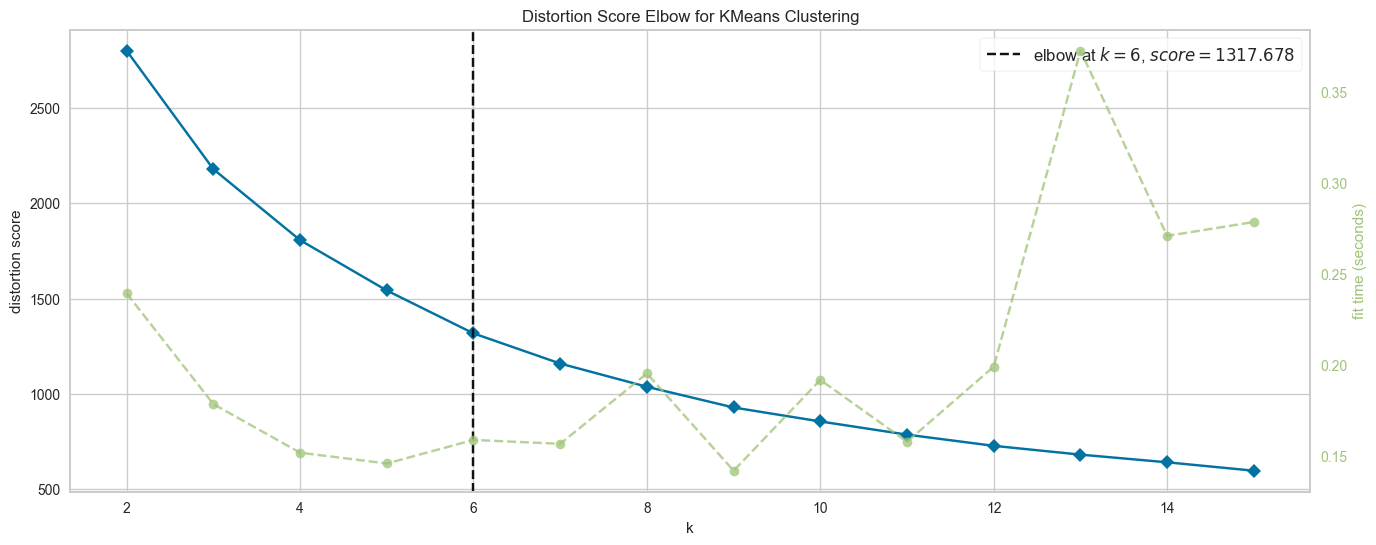

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
visualizer = KElbowVisualizer(KMeans(), k=15)

visualizer.fit(principalData)
visualizer.show()

Dari Visualisasi **Elbow Method** di atas, dapat kita simpulkan bahwa nilai K / jumlah Cluster terbaik untuk Model Clustering-nya adalah 6 (**K = 6** atau jumlah Cluster = 6)

**Inertia Evaluation**

Melakukan **Inertia Evaluation** untuk melihat perbandingan nilai Inertia antar K. Apabila perbedaan nilai Inertia antara suatu nilai K dengan nilai K berikutnya sampai seterus-seterusnya sudah mulai tidak terlalu besar dibandingkan dengan perbedaan-perbedaan nilai Inertia antar nilai K sebelum-sebelumnya, maka nilai K tersebut dapat disimpulkan menjadi nilai K terbaik.

In [33]:
# Inertia
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state = 0)
    kmeans = kmeans.fit(principalData)
    labels = kmeans.predict(principalData)
    inertia = kmeans.inertia_
    print("K:", k, inertia)
    print("")

K: 1 4141.03300674269

K: 2 2800.1676638526237

K: 3 2178.8819475231426

K: 4 1807.388452950012

K: 5 1542.6125910836363

K: 6 1313.2411127162404

K: 7 1160.8553920908053

K: 8 1038.9768901348857

K: 9 935.0455696313998

K: 10 851.1512019587841



Dari hasil **Inertia Evaluation** di atas, dapat kita lihat bahwa pada saat nilai K = 6, antara nilai K = 6 dan K = 7 sudah tidak terlalu besar sehingga dapat disimpulkan bahwa K = 6 memang merupakan nilai K terbaik untuk Model Clustering-nya

# K-Means

Melakukan Algoritma **K-Means** untuk Clustering serta melakukan Visualisasi Model Clustering

**Hasil Clustering**

Di bawah ini dapat dilihat Hasil Clustering dengan menggunakan algoritma **K-Means**

In [34]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(principalData)

visualize_clustering(principalData, kmeans.labels_, title="KMeans Clustering with K = 6")

**Clusters Centroid**

Di bawah ini merupakan Titik Pusat (**Centroid**) tiap Cluster

In [35]:
print(kmeans.cluster_centers_)

[[-1.87320443  0.86462385  0.36779116]
 [ 2.42091781  0.28925952  0.48545373]
 [ 0.53772811 -1.14014958 -0.18256187]
 [ 0.6831629   1.05028936 -0.66945396]
 [-1.15720479 -0.55538098 -0.97348008]
 [-0.41165225  0.14366637  1.36413405]]


**Silhouette Score Evaluation**

Nilai hasil **Silhouette Coefficient** terletak pada kisaran nilai -1.00 hingga 1.00. Semakin mendekati nilai 1.00, maka semakin baik pengelompokan data dalam suatu cluster. Sebaliknya jika semakin mendekati nilai -1.00, maka semakin buruk pengelompokan data dalam suatu cluster.

In [36]:
# Silhouette Score of the Clustering Model with K = 6 (6 Clusters)
print("Silhouette Score : ")
silhouette_score(principalData, kmeans.labels_)

Silhouette Score : 


0.48892513264105114

Dari hasil **Silhouette Evaluation** di atas, dapat disimpulkan bahwa dalam melakukan Clustering dengan algoritma K-Means untuk dataset StudentsPerformance.csv, hasil pengelompokan data dalam suatu cluster-nya sudah cukup baik karena nilai **Silhouette Coefficient** mendekati nilai 1.00, yaitu 0.48698

**Membuat Kolom Cluster**

Pembuatan kolom baru, yaitu kolom **Cluster** dalam Dataset untuk dapat melihat dengan jelas masing-masing data siswa masuk ke dalam Cluster berapa

In [37]:
df["Cluster"] = kmeans.labels_
df

,parental level of education,lunch,test preparation course,math score,reading score,Cluster
0,1,1,0,72,72,4
1,3,1,1,69,90,0
2,0,1,0,90,95,4
3,2,0,0,47,57,3
4,3,1,0,76,78,4
...,...,...,...,...,...,...
995,0,1,1,88,99,0
996,4,0,0,62,55,1
997,4,0,1,59,71,5
998,3,1,1,68,78,5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   parental level of education  1000 non-null   int64
 1   lunch                        1000 non-null   int64
 2   test preparation course      1000 non-null   int64
 3   math score                   1000 non-null   int64
 4   reading score                1000 non-null   int64
 5   Cluster                      1000 non-null   int32
dtypes: int32(1), int64(5)
memory usage: 43.1 KB


**Export Machine Learning Model**

Meng-Export **KMeans**, **PCA**, dan **StandardScaler** untuk nantinya di-Import ke dalam file app.py untuk menjalankan Machine Learning pada tiap Input dalam Web. Proses Export ini dilakukan dengan bantuan Library **pickle**.

In [39]:
import pickle

pickle.dump(kmeans, open('model.pkl', 'wb'))

In [40]:
pickle.dump(pca, open('pca.pkl', 'wb'))

In [41]:
pickle.dump(sc, open('sc.pkl', 'wb'))